In [1]:
#Buscamos es un modelo de scoring
#Tareas: EDA, Filters/Transformaciones, ex. SVM, Arboles, Ensamble, etc.
#minimo de 75% acuracy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.cluster import KMeans

In [2]:
datos = pd.read_csv('FinancialBehavior.csv', index_col = 0)
datos.head()

/home/sandy/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,PROV_CUENTA,PROV_TIPO_DOCUMENTO,PROV_NUM_DOCUMENTO,PROV_FEC_APER,ALTURA_MORA,MORA_MAXIMA,MES_1,MES_2,MES_3,MES_4,...,MES_27,MES_28,MES_29,MES_30,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36
1,8228769611,1,79611181,20161006,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,8169086811,1,52249171,20140503,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8113372805,1,93377389,20110828,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8224958500,1,1113629973,20160814,0.0,20.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5,8237356206,1,51652333,20170127,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [3]:
len(datos)

2488193

In [4]:
#reducimos dataframe a la tercera parte
datos= datos.iloc[:829397]
len(datos)


829397

In [5]:
#Quitamos PROV_CUENTA, PROV_FEC_APER, PROV_NUM_DOCUMENTO ,PROV_TIPO_DOCUMENTO
datos = datos.drop(['PROV_CUENTA', 'PROV_FEC_APER', 'PROV_NUM_DOCUMENTO' ,'PROV_TIPO_DOCUMENTO'],  axis=1 )
datos.head()
datos.to_csv('datos1.csv', index=False)

In [11]:
datos = pd.read_csv('datos1.csv')
datos.head()

,ALTURA_MORA,MORA_MAXIMA,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,...,MES_27,MES_28,MES_29,MES_30,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [12]:
#Revision para verificar datos numericos
datos.dtypes


ALTURA_MORA    float64
MORA_MAXIMA    float64
MES_1          float64
MES_2          float64
MES_3          float64
MES_4          float64
MES_5          float64
MES_6          float64
MES_7          float64
MES_8          float64
MES_9          float64
MES_10         float64
MES_11         float64
MES_12         float64
MES_13         float64
MES_14         float64
MES_15         float64
MES_16         float64
MES_17         float64
MES_18         float64
MES_19         float64
MES_20         float64
MES_21         float64
MES_22         float64
MES_23         float64
MES_24         float64
MES_25         float64
MES_26         float64
MES_27         float64
MES_28         float64
MES_29         float64
MES_30         float64
MES_31         float64
MES_32         float64
MES_33         float64
MES_34         float64
MES_35         float64
MES_36         float64
dtype: object

In [13]:
#Revisamos que no haya NaN
#for i in datos:
#    cat = pd.Categorical(datos[i])
#    print(cat.describe())

In [14]:
y = datos[['ALTURA_MORA','MORA_MAXIMA']].copy()
datos=datos.drop(['ALTURA_MORA','MORA_MAXIMA'], axis=1)
y.head()

,ALTURA_MORA,MORA_MAXIMA
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,20.0
4,0.0,0.0


None


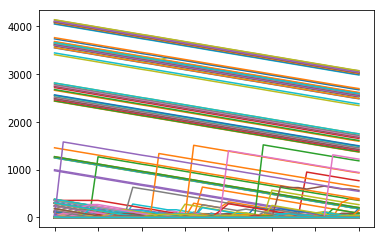

In [15]:
print(datos.iloc[4000:5000,0:36].T.plot().get_legend().remove())

In [16]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(datos)

In [17]:
result = kmeans.predict(datos)

In [18]:
datos["resultado"] = result + 1

In [19]:
datos.tail()

,MES_1,MES_2,MES_3,MES_4,MES_5,MES_6,MES_7,MES_8,MES_9,MES_10,...,MES_28,MES_29,MES_30,MES_31,MES_32,MES_33,MES_34,MES_35,MES_36,resultado
829392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
829393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,1
829394,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,1
829395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
829396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1


/home/sandy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/sandy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


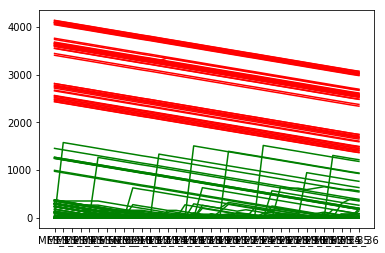

In [20]:
import matplotlib.pyplot as plt
plt.plot(datos.iloc[4000:5000,0:36][(datos.iloc[:,36] == 1)].T, color="g")
plt.plot(datos.iloc[4000:5000,0:36][(datos.iloc[:,36] == 2)].T, color="r")